In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

0

In [11]:
def conv(value):
  if value == 1:
    return "Yes"
  else:
    return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


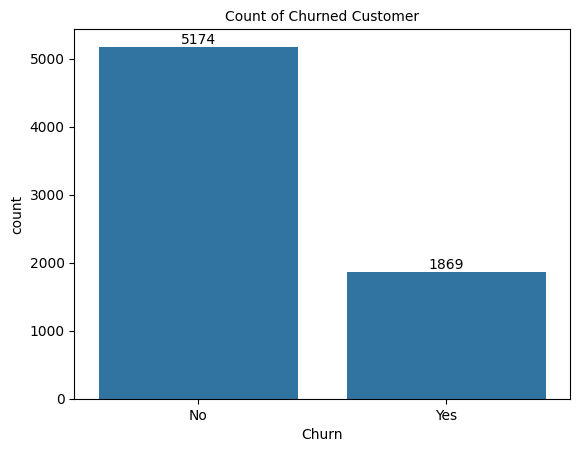

In [13]:
ax = sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customer", fontsize = 10)
plt.show()

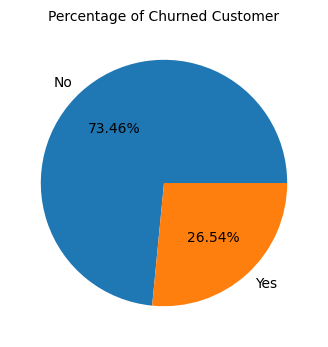

In [14]:
plt.figure(figsize =(4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title("Percentage of Churned Customer", fontsize = 10)
plt.show()

Out of total customers 26.5% customers had churned out of the company

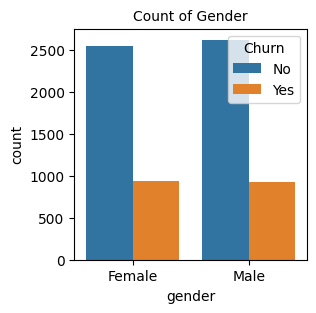

In [15]:
plt.figure(figsize = (3,3))
sns.countplot(x='gender', data=df, hue='Churn')
plt.title("Count of Gender", fontsize = 10)
plt.show()

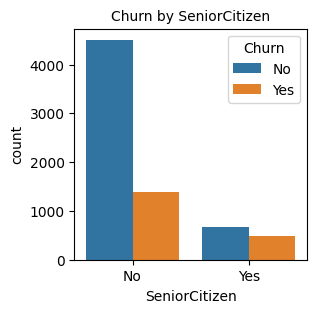

In [16]:
plt.figure(figsize = (3,3))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title("Churn by SeniorCitizen", fontsize = 10)
plt.show()

The count of senior citizen is less but they tend to churned more than non senior citizen

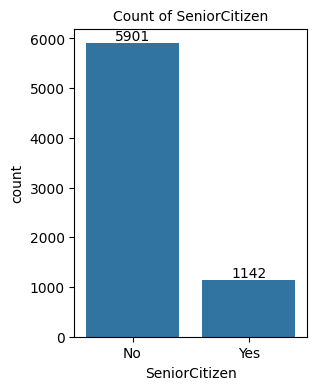

In [17]:
plt.figure(figsize= (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen", fontsize = 10)
plt.show()

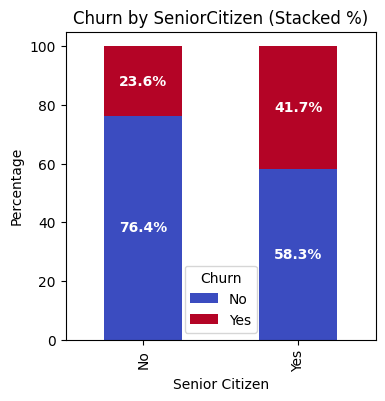

In [18]:
df_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
df_percent.plot(kind="bar", stacked=True, ax=ax, colormap="coolwarm")

# Add percentage labels
for bar_container in ax.containers:
    ax.bar_label(bar_container, fmt='%.1f%%', label_type="center", color="white", fontsize=10, weight="bold")

plt.title("Churn by SeniorCitizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()

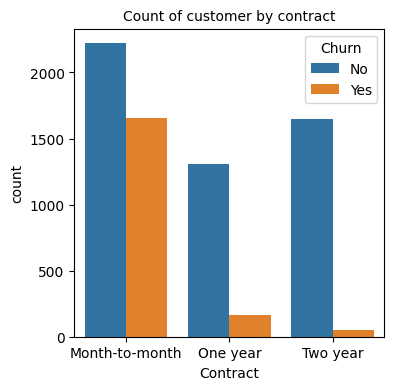

In [23]:
plt.figure(figsize = (4,4))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title("Count of customer by contract", fontsize = 10)
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

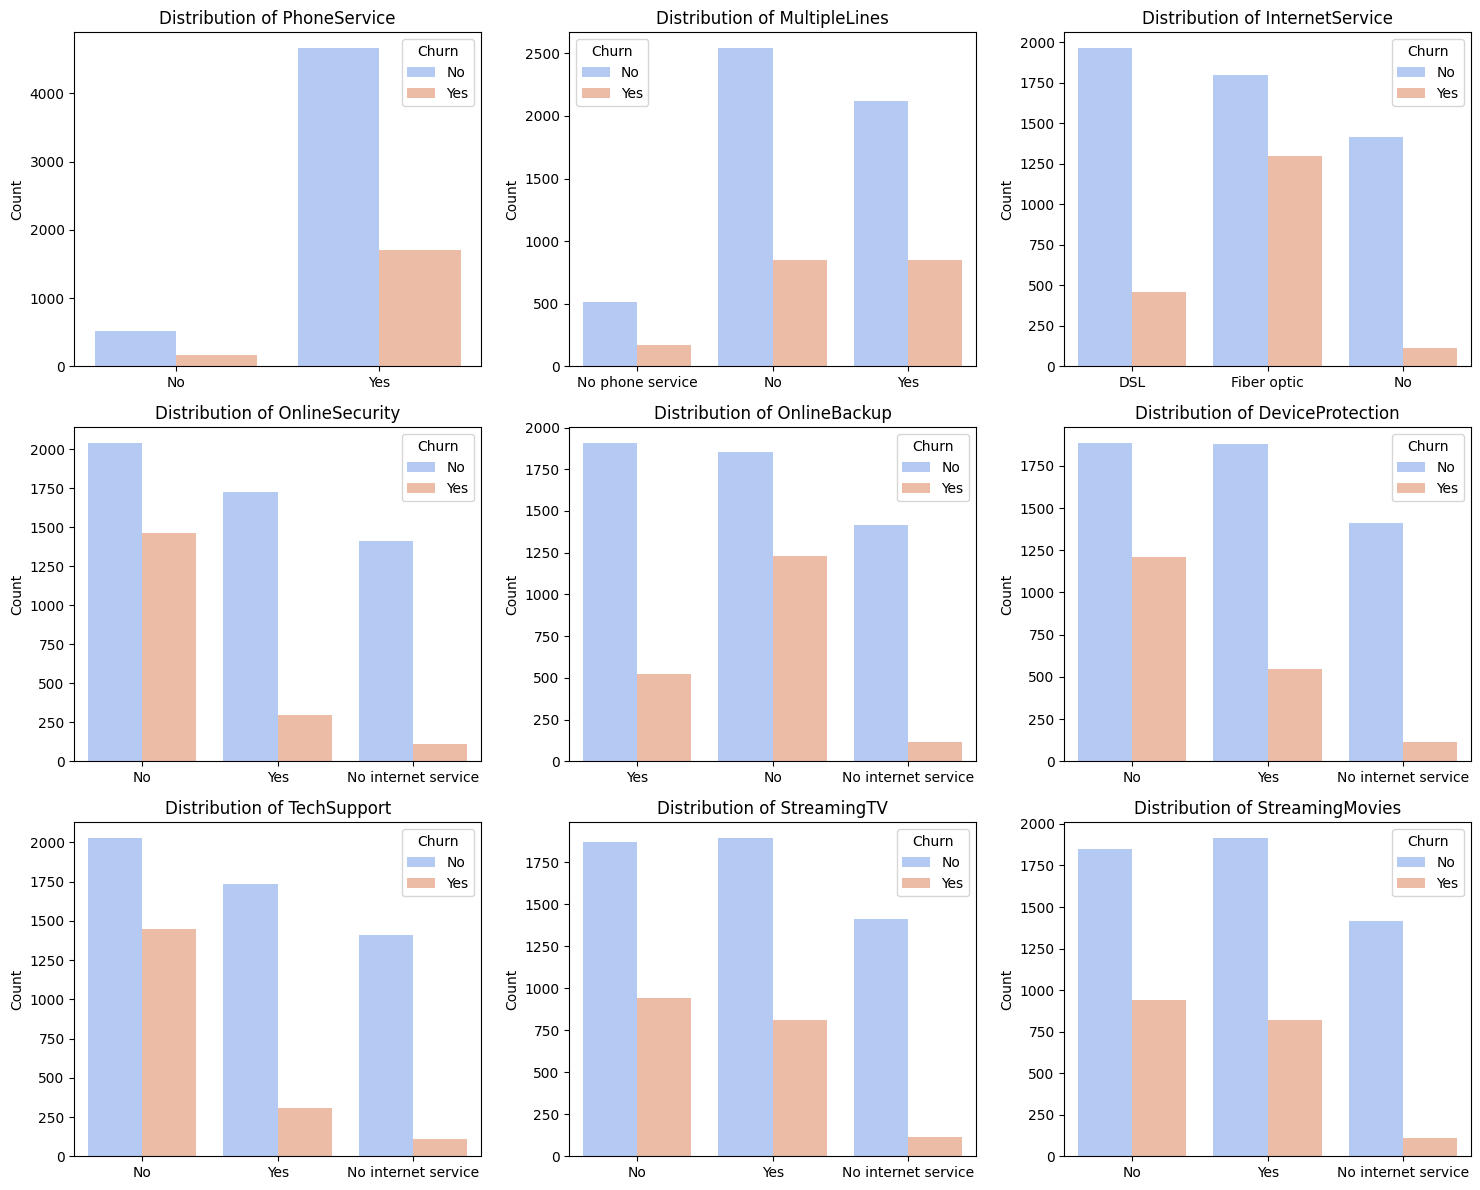

In [28]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define the number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create countplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm", hue = df['Churn'])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The subplots illustrate customer churn distribution across various telecom services. Churn is notably higher among customers without security-related services (OnlineSecurity, TechSupport, DeviceProtection). Fiber Optic users show a higher churn rate compared to DSL users. Customers with StreamingTV and StreamingMovies also exhibit increased churn, suggesting entertainment services may influence retention. Overall, a lack of value-added services correlates with higher churn.

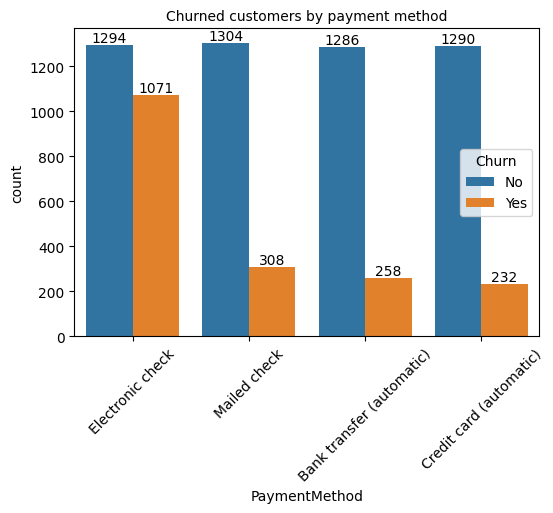

In [32]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.title("Churned customers by payment method", fontsize = 10)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

The customers who pay by electronic or mailed checks are likely more to churn out when compared to bank or credit card transfer(automatic payment)